# Image Classification - Fashion-MNIST Dataset - Neural Network vs. Convolutional Neural Network
### This exercise demonstrates image classification of the Fashion-MNIST dataset using Tensorflow Keras Neural Network and a Convolutional Neural Network.  
#### The website notes:
#### "[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. "
### The dataset is available through Keras as well. 

![Fashion MNIST](https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png)


In [252]:
# Import the necessary libraries, set random seed
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# initialize the seeds of different random number generators. Results will be the same each time the notebook is run
# keras.utils.set_random_seed(42)
tf.random.set_seed(42)

### Let's load the Fashion-MNIST dataset through Keras

In [253]:
# Fashion-MNIST dataset is loaded into x_train, y_train, x_test, y_test
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

### Check the shape of the x and y training dataset.
#### (60000, 28, 28) indicates there are 60,000 images in the training set, each on a 28x28 matrix.

In [254]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


### Check the shape of the x and y test dataset
### (10000, 28, 28) indicates there are 10,000 images in the test set, each on a 28x28 matrix.

In [255]:
print(x_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


### Examine the first 10 rows of the y training set (y_train)

In [256]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

### The y_train array shows the Fashion-MNIST database is made up of numbers 0-9 that correspond to different Fashion items.
[Fashion MNIST Github Labels](https://github.com/zalandoresearch/fashion-mnist#labels): 

| Label  | Description  |
|---|---|
|  0 | T-shirt/top  |
|  1 |  Trouser |
|  2 |   Pullover |
|  3 |  Dress |
|  4 |  Coat |
|  5 |  Sandal |
|  6 |   Shirt |
|  7 |  Sneaker |
|  8 |   Bag |
|  9 |  Ankle boot |

### Create a python list to store the Fashion-MNIST labels (0-9) Descriptions

In [257]:
labels = ["T-shirt/top",
         "Trouser",
         "Pullover",
         "Dress",
         "Coat",
         "Sandal",
         "Shirt",
         "Sneaker",
         "Bag",
         "Ankle boot"]

### Check the the value of the first y_train
#### The first image in the y_train is an Ankle Boot

In [258]:
labels[y_train[0]]

'Ankle boot'

### Check the Image Raw Data
#### The raw data for the image is comprised of numbers 0 (black pixel) to 255 (white pixel). If the pixel is color then there are three numbers for each pixel RGB (red, green, blue). 

In [259]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

### Examine the first 25 images using plt.imshow()

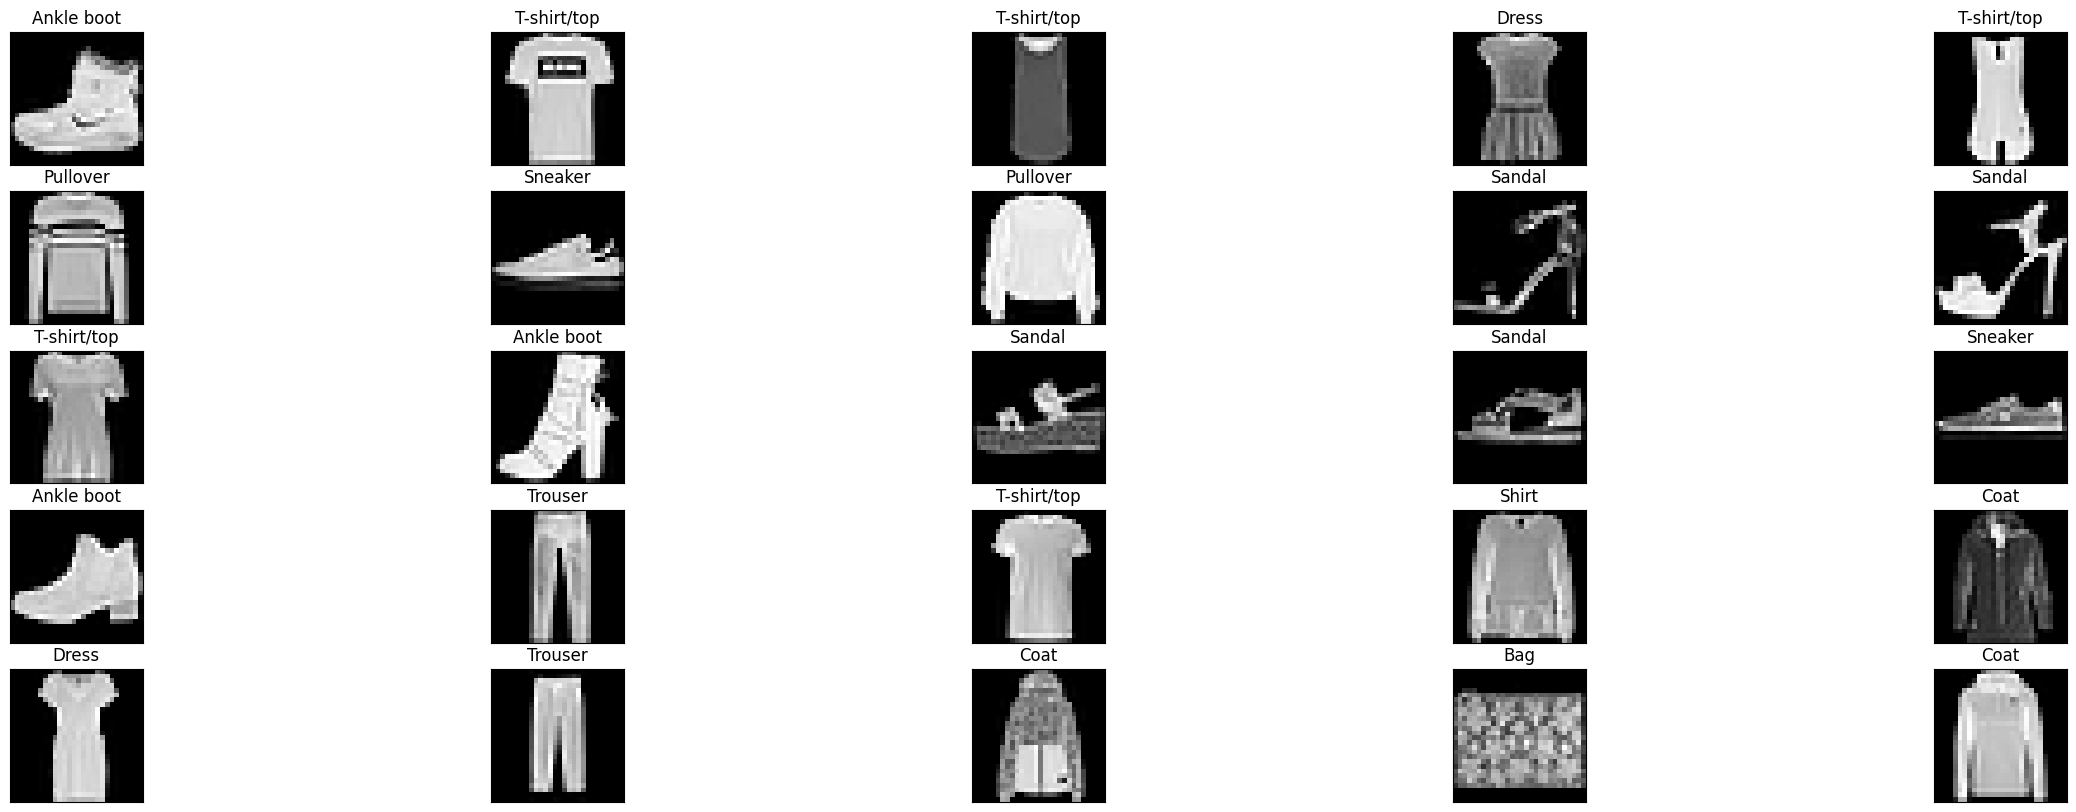

In [260]:
# Create fig variable and set size
fig = plt.figure(figsize=(30,10))
# for loop for the range(number) of images to plot. The range can be set 1-25
for i in range(25):
# add to subplot for each i as it iterates
    ax = fig.add_subplot(5,5, i+1, xticks=[], yticks=[])
# set label as title for each i in y_train
    ax.set_title(f"{labels[y_train[i]]}")
# plot each i in x_train
    ax.imshow(x_train[i], cmap="gray")

### A Neural Network with a Single Hidden Layer is completed first:
#### Neural networks perform best when the independent variable is in a small range. Data can be standardized by
#### 1. Subtract the mean and divide by the standard deviation
#### 2. Divide by maximum value if in a guaranteed range. 
### The input pixel range is 0 to 255, so we will normalize our data to 0-1 by dividing each data point by 255.
### The value between 0 and 1 could be viewed as the percentage total (255).  

In [261]:
# Neural network data preparation: Standardize x_train and x_test by dividing every value by 255
x_train = x_train/255.0
x_test = x_test/255.0

### Define the Model in Keras
#### Input: 28x28 matrices of numbers. The matrices are flattened into a long vector to be fed into the hidden layer. 
#### Hidden Layers: Single hidden layer with 256 ReLU neurons
#### Output Layer: Multi-class classification problems requires network to predict the probability it is one of the 10 categories. A Softmax Activation Function provides the probability (between 0 and 1) for each variable and the total sum of all the variables is equal to 1.
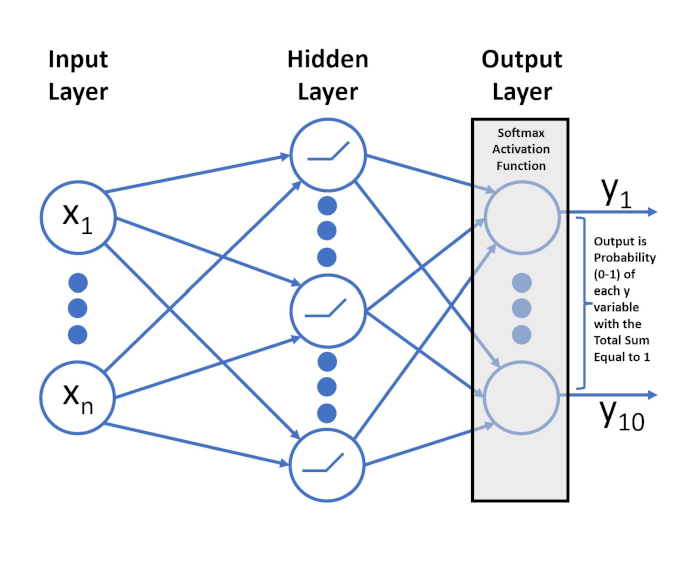

In [262]:
# Define Input Layer
input = keras.Input(shape=(28,28))

# Convert/flatten the 28 x 28 matrix of numbers into a long vector
h = keras.layers.Flatten()(input)

# The long vector is fed into the hidden layer, which is comprised of 256 ReLU neurons
h = keras.layers.Dense(256, activation="relu", name="Hidden")(h)

# The output of the hidden layer is fed into the Softmax Activation Function with 10 outputs
output = keras.layers.Dense(10, activation="softmax", name="Output")(h)

# Define Model in Keras as (input,output)
model = keras.Model(input, output)

In [263]:
model.summary()

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)     │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden (Dense)                  │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

### The model summary states there are 203,530 parameters. This can be verified manually:

In [264]:
# Each image is 28 by 28, so the input parameters (784 = 28*28)
input_params = 28*28
print('There are: ', input_params, 'input parameters')

# There are 256 ReLU neurons in the hidden layer
hidden_params = input_params*256+256
print('There are: ', hidden_params, 'hidden parameters')

# There are 256 neurons in the hidden layer with 10 outputs of the softmax output activation function
output_params = 256*10+10
print('There are: ', output_params, 'output parameters')

# Add all parameters for total
tot_parameters = hidden_params + output_params
print('There are (hidden parameters + output parameters): ', tot_parameters, 'total parameters')

There are:  784 input parameters
There are:  200960 hidden parameters
There are:  2570 output parameters
There are (hidden parameters + output parameters):  203530 total parameters


### Visualize the Neural Network using Keras plot_model

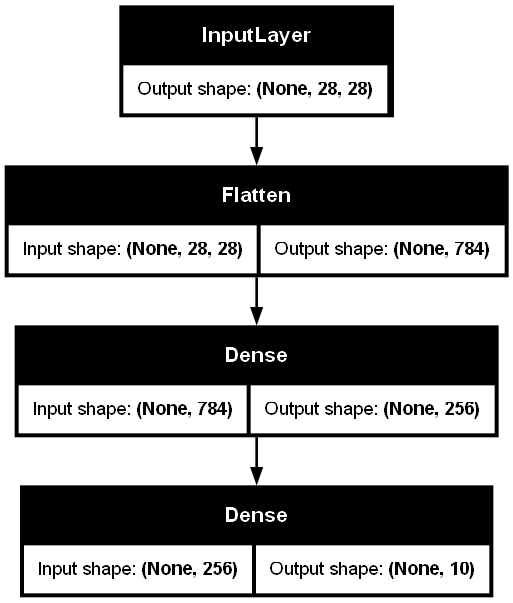

In [265]:
keras.utils.plot_model(model, show_shapes=True, dpi=96)

### Set Neural Network Optimization Parameters and Compile Model
### The model was defined in the previous step but we still need to provide Keras:

#### Optimizer - Adam is selected as a default which is an SGD flavor
#### Loss Function - The model's output is categorical with 10 levels, so sparse_categorical_crossentropy is selected.
#### Metrics - This is a classifcation problem, so Accuracy is selected.

In [266]:
# Set Optimization Parameters and Compile Model
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

### Train the Model
#### The batch sizes 32 and 64 are commonly used. 
#### The number of epochs (passes through the training data), starting with 10-20.

In [267]:
# The model is fit with the model.fit() command, batch size 64 and epochs 10. 
batch_size = 64
epochs = 10

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7785 - loss: 0.6362
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8619 - loss: 0.3888
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8771 - loss: 0.3410
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8859 - loss: 0.3140
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8927 - loss: 0.2924
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8991 - loss: 0.2748
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9035 - loss: 0.2602
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9084 - loss: 0.2478
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9116 - loss: 0.2372
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9163 - loss: 0.2264


### Evaluate the Neural Network Model 
#### The model achieves high accuracy (>91%) on the training set, which could indicate the model is overfitting.
### Now we check how the model does on the test set. 
#### The model.evaluate() function can be used to calculate the performance of the model on any dataset.

In [268]:
# The Neural Network Model is evaluated on the test dataset. 
score_nn = model.evaluate(x_test, y_test)
print("Neural Network Test Accuracy:", score_nn[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.8777 - loss: 0.3465
Neural Network Test Accuracy: 0.8819000124931335


### The model had an ~88% accuracy on the test dataset.

# Convolutional Neural Network

### Convolutional neural networks (ConvNets or CNNs) were specifically design to work with image classification and computer vision. More information about CNNs can be found here:
#### https://www.datacamp.com/tutorial/introduction-to-convolutional-neural-networks-cnns
#### https://www.ibm.com/topics/convolutional-neural-networks
#### The IBM website notes, "Convolutional neural networks use three-dimensional data for image classification and object recognition tasks. Convolutional neural networks are distinguished from other neural networks by their superior performance with image, speech, or audio signal inputs. They have three main types of layers, which are: 1) Convolutional layer, 2) Pooling layer, and 3) Fully-connected (FC) layer."

### The ConvNet will be constructed in the same sequence as the neural network above. The general steps are:
#### 1. Data Preparation
#### 2. Define the Model
#### 3. Set the Optimization Parameters
#### 4. Train the Model on the Training Dataset
#### 5. Evaluate/Test the Model on the Test Dataset

### Data Preparation
#### ConvNets also function best when the input data is normalized. The x_train and y_train data was normalized in the steps above. The shape of each is checked to verify. The x_train datasets includes 60,000 images that are 28x28

In [269]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


### An Additional Dimension is Added, which is required with color images (RGB). x_train.shape is utilized again to ensure the additional dimension was successfully added.

In [270]:
# Another dimension is added to x_train and x_test
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [271]:
x_train.shape

(60000, 28, 28, 1)

### Define the Model - Convolutional Neural Network (CovNet or CNN)

In [272]:
# Define the input shape to keras
input = keras.Input(shape=x_train.shape[1:])

# Define first convolutional block - ReLU Activation layer
x = keras.layers.Conv2D(32, kernel_size=(2,2), activation="relu", name="Conv_1")(input) # conv layer
x = keras.layers.MaxPool2D()(x) # pooling layer 2D

# Define second convolutional block - ReLU Activation Layer
x = keras.layers.Conv2D(32, kernel_size=(2,2), activation="relu", name="Conv_2")(x) # conv layer 2
x = keras.layers.MaxPool2D()(x) # pooling layer 2

# Flatten the layers
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256, activation="relu")(x)

# Define output layer with a Softmax Activation function 
output = keras.layers.Dense(10, activation="softmax")(x)

# Define the model as input and output
model = keras.Model(input, output)

In [273]:
model.summary()

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_1 (Conv2D)                 │ (None, 27, 27, 32)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_2 (Conv2D)                 │ (None, 12, 12, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 302,026 (1.15 MB)

 Trainable params: 302,026 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

### Visualize the Layers of the CNN

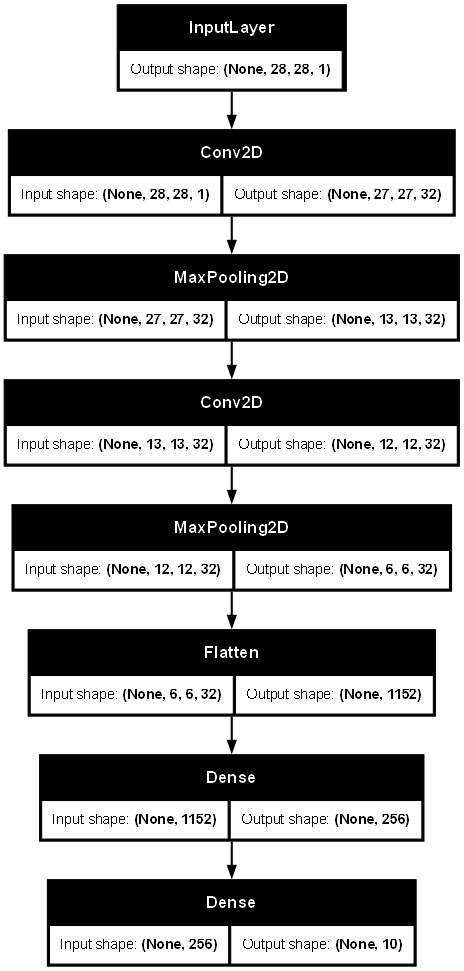

In [274]:
keras.utils.plot_model(model, show_shapes=True, dpi=75)

### Set CNN Optimization Parameters and Compile the Model
### The model was defined in the previous step but we still need to provide Keras:

#### Optimizer - Adam is selected as a default which is an SGD flavor
#### Loss Function - The model's output is categorical with 10 levels, so sparse_categorical_crossentropy is selected.
#### Metrics - This is a classifcation problem, so Accuracy is selected.

In [275]:
# Set Optimization Parameters and Compile Model
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

### Train the CNN Model
#### batch_size = 64, epochs = 10

In [276]:
model.fit(x_train, y_train, batch_size=64, epochs=10)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7636 - loss: 0.6654
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8802 - loss: 0.3311
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8976 - loss: 0.2792
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9103 - loss: 0.2457
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9197 - loss: 0.2202
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9263 - loss: 0.1991
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9336 - loss: 0.1795
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9405 - loss: 0.1605
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9464 - loss: 0.1448
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9535 - loss: 0.1274


### Evaluate the CNN Model
### Now we check how the model does on the test set. 
#### The model.evaluate() function can be used to calculate the performance of the model on any dataset.

In [277]:
# Calculate Accuracy of the CNN Model: 
score = model.evaluate(x_test, y_test)
print("Convolutional Neural Network Test Accuracy:", score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9078 - loss: 0.3066
Convolutional Neural Network Test Accuracy: 0.9083999991416931


### The State of the Art (SOTA) Fashion-MNIST Model accuracy is approximately 96.91%! 
#### The SOTA leaderboard may be found here: https://paperswithcode.com/sota/image-classification-on-fashion-mnist
#### The Fine-Tuning DARTS model (2020) is the leader at the time of this notebook (August 2024). The model has 3.09% error and 3,200,000 parameters. More information can be found on the website link.